In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats


In [2]:
plex1df = pd.read_csv('Sac Perch Plex 1 Genotypes Table.csv')
plex2df = pd.read_csv('Sac Perch Plex 2 Genotypes Table.csv')
plex3df = pd.read_csv('Sac Perch Plex 3 Genotypes Table.csv')
plex1df = plex1df.sort_values(by='Sample Name')
plex1df =plex1df.reset_index(drop=True) 
plex2df = plex2df.sort_values(by='Sample Name')
plex2df =plex2df.reset_index(drop=True) 
plex3df = plex3df.sort_values(by='Sample Name')
plex3df =plex3df.reset_index(drop=True) 

print(plex3df.shape)
plex3df

(32, 47)


,Sample File,Sample Name,Run Name,Panel,Marker,Dye,SNP,Allele1,Allele2,Size1,...,NB,CC,OVL,XTLK,GQ,CV,UD1,UD2,UD3,Unnamed: 46
0,frag_079_A09.fsa,MP3-AL-025,20171024,MP3_SP,AinAD101,B,NaN,133,137,131.40,...,-2,-2,-2,0,0.0000,NaN,NaN,NaN,NaN,NaN
1,frag_077_B09.fsa,MP3-AL-026,20171024,MP3_SP,AinAD101,B,NaN,129,133,128.53,...,-1,-1,-2,-2,-2.0000,-1.0,-4.0,1.0,NaN,NaN
2,frag_075_C09.fsa,MP3-AL-027,20171024,MP3_SP,AinAD101,B,NaN,129,133,128.67,...,-2,-2,-2,0,0.3123,NaN,NaN,NaN,NaN,NaN
3,frag_073_D09.fsa,MP3-AL-028,20171024,MP3_SP,AinAD101,B,NaN,137,151,137.14,...,-1,-4,-2,-2,-2.0000,-1.0,-4.0,1.0,NaN,NaN
4,frag_071_E09.fsa,MP3-AL-029,20171024,MP3_SP,AinAD101,B,NaN,133,141,132.97,...,-1,-1,-2,-2,-2.0000,-1.0,-4.0,1.0,NaN,NaN
5,frag_069_F09.fsa,MP3-AL-030,20171024,MP3_SP,AinAD101,B,NaN,129,133,128.48,...,-4,-4,-1,-1,-2.0000,-2.0,-2.0,-1.0,-4.0,1.0
6,frag_067_G09.fsa,MP3-AL-031,20171024,MP3_SP,AinAD101,B,NaN,133,133,132.87,...,-2,-2,-2,-1,-4.0000,1.0,NaN,NaN,NaN,NaN
7,frag_065_H09.fsa,MP3-AL-032,20171024,MP3_SP,AinAD101,B,NaN,121,129,120.41,...,-2,-2,-2,0,0.6245,NaN,NaN,NaN,NaN,NaN
8,frag_066_H10.fsa,MP3-AL-033,20171024,MP3_SP,AinAD101,B,NaN,133,151,132.94,...,-4,-1,-4,-2,-2.0000,-2.0,-1.0,-1.0,1.0,NaN
9,frag_068_G10.fsa,MP3-AL-034,20171024,MP3_SP,AinAD101,B,NaN,121,133,120.37,...,-4,-1,-1,-2,-2.0000,-2.0,-1.0,-4.0,1.0,NaN


In [3]:
print(plex2df.shape)
plex2df.head()


(32, 41)


,Sample File,Sample Name,Run Name,Panel,Marker,Dye,Allele1,Allele2,Size1,Size2,...,DP,NB,CC,OVL,XTLK,GQ,CV,UD1,UD2,UD3
0,frag_047_A05.fsa,MP2-AL-025,20171024,MP2_SP,AinA216,B,153,161,152.19,160.67,...,-2,-2,-2,-2,0,0.3945,NaN,NaN,NaN,NaN
1,frag_045_B05.fsa,MP2-AL-026,20171024,MP2_SP,AinA216,B,161,161,160.67,160.67,...,-2,-2,-2,-2,0,0.1972,NaN,NaN,NaN,NaN
2,frag_043_C05.fsa,MP2-AL-027,20171024,MP2_SP,AinA216,B,153,165,152.28,164.61,...,-2,-2,-2,-2,0,0.7888,NaN,NaN,NaN,NaN
3,frag_041_D05.fsa,MP2-AL-028,20171024,MP2_SP,AinA216,B,153,153,152.12,152.12,...,-2,-2,-2,-2,0,0.7889,NaN,NaN,NaN,NaN
4,frag_039_E05.fsa,MP2-AL-029,20171024,MP2_SP,AinA216,B,169,185,168.88,185.07,...,-2,-2,-2,-2,0,0.7889,NaN,NaN,NaN,NaN


# making plotsss

In [4]:
def plot_microsat_allele_dist(df, gray = 0):
    df2 = df[df["Size1"]> 50]
    df2 = df2[df2["Size2"]> 50]

    if gray == 1: 
        (sns.jointplot("Allele1", "Allele2", data=df2, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
        plt.title("                                                                                "+'allele \n                                                                                     Distribution')
        return  
    sns.jointplot("Allele1", "Allele2", data=df2, kind="kde", space=0, color="gray")
    plt.title("allele\n    distribution")
    


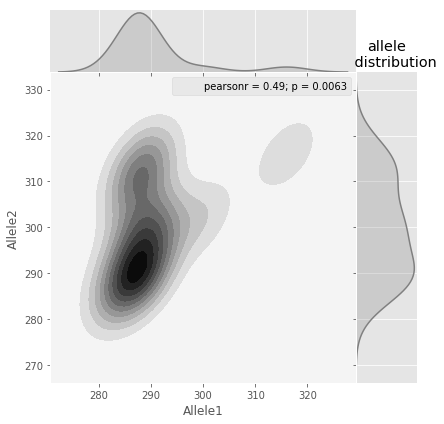

In [5]:
plot_microsat_allele_dist(plex1df)

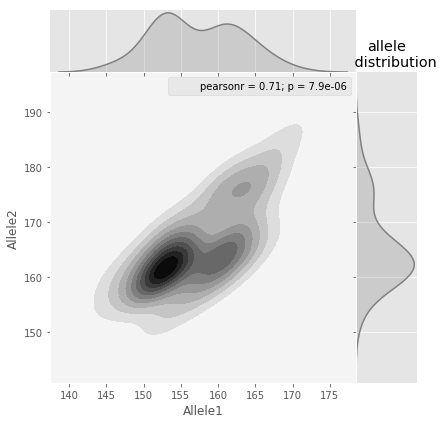

In [6]:
plot_microsat_allele_dist(plex2df)

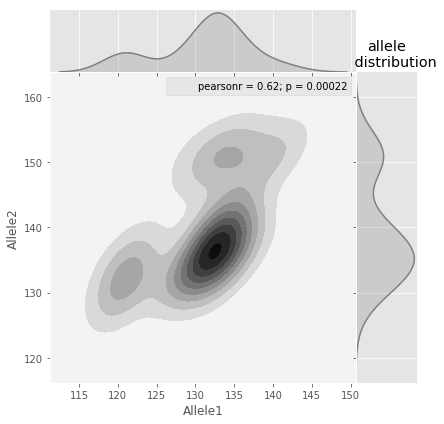

In [7]:
plot_microsat_allele_dist(plex3df)

Text(0.5,1,'Plex3')

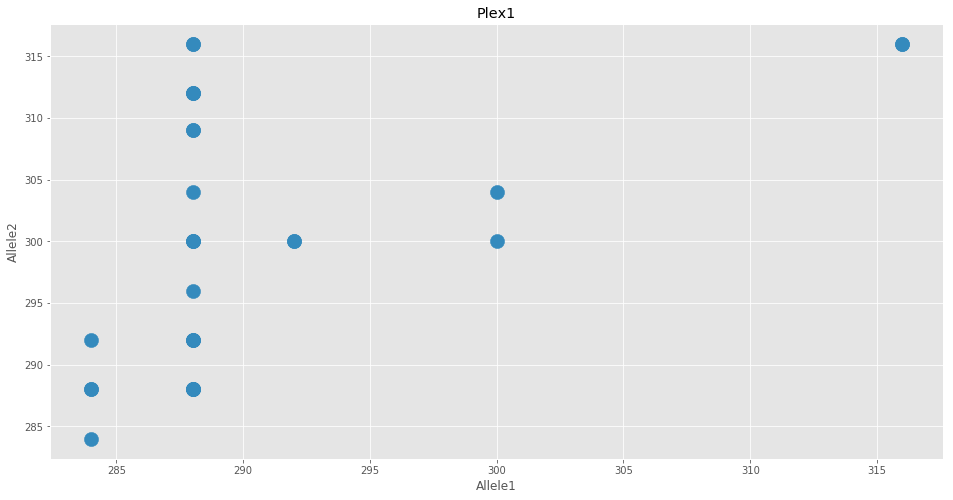

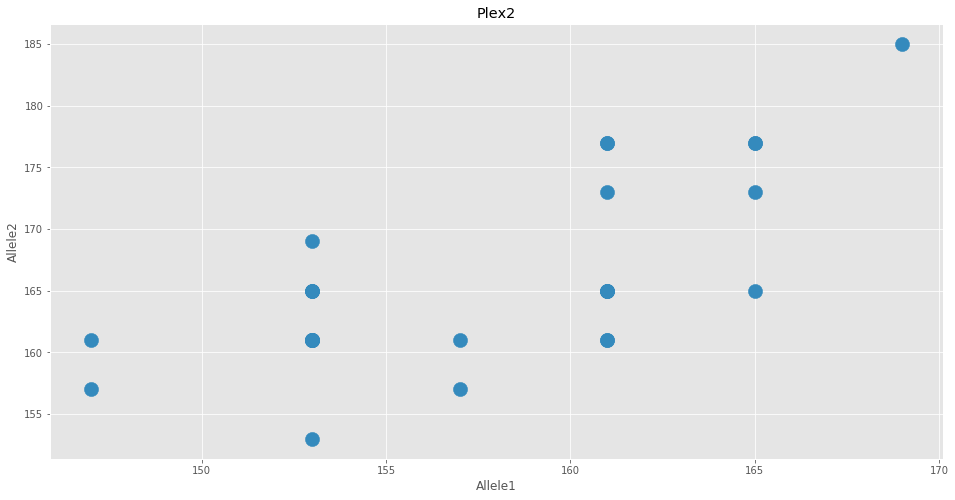

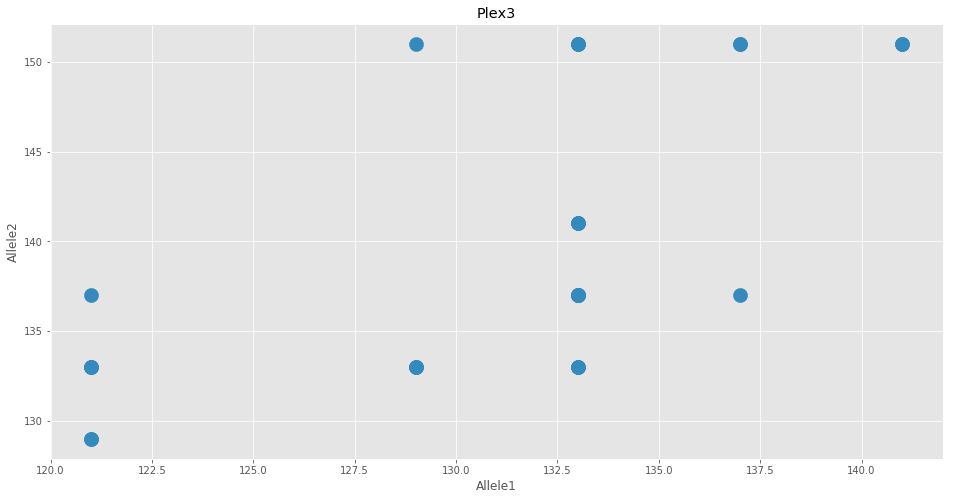

In [8]:
plex1df[plex1df['Allele1']!= 0].plot.scatter('Allele1', 'Allele2', s = 200)
plt.title('Plex1')
plex2df[plex2df['Allele1']!= 0].plot.scatter('Allele1', 'Allele2', s =200)
plt.title('Plex2')
plex3df[plex2df['Allele1']!= 0].plot.scatter('Allele1', 'Allele2', s =200)
plt.title('Plex3')

# calculating heterozigosity and FIS for the sacramento population

In [9]:
def Expected_Heterozigosity(loci, pop):
    unique_elements, counts_elements = np.unique(list(pop[loci].values), return_counts=True)
    counts_elements = np.array(counts_elements/sum(counts_elements))
    return 1 - sum(counts_elements*counts_elements)

def Heterozigosity(loci, pop):
    result = 0
    for i in pop[loci].values:
        if i[0] != i[1]: result += 1
    return result/pop.shape[0]



the observed heterozigosity for plex 1,2,3 are respectively: (0.7, 0.8387096774193549, 0.8709677419354839)
the expected heterozigosity for plex 1,2,3 are respectively: (0.74777777777777776, 0.78511966701352764, 0.8709677419354839)


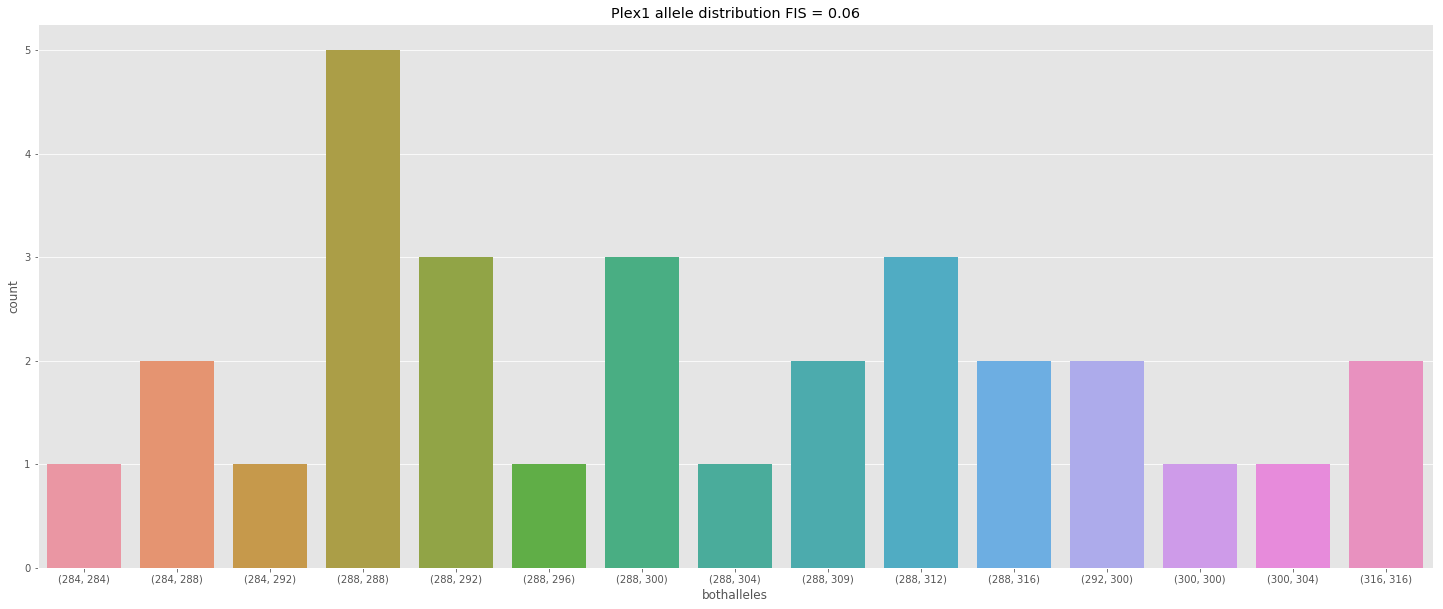

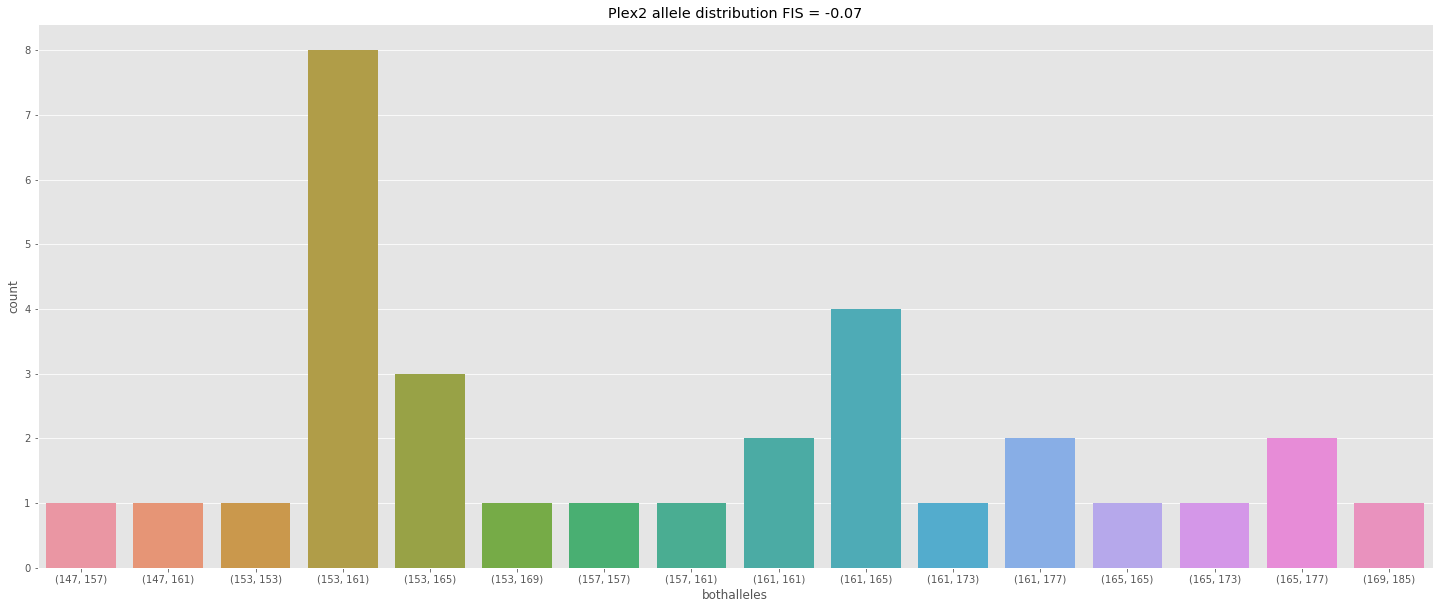

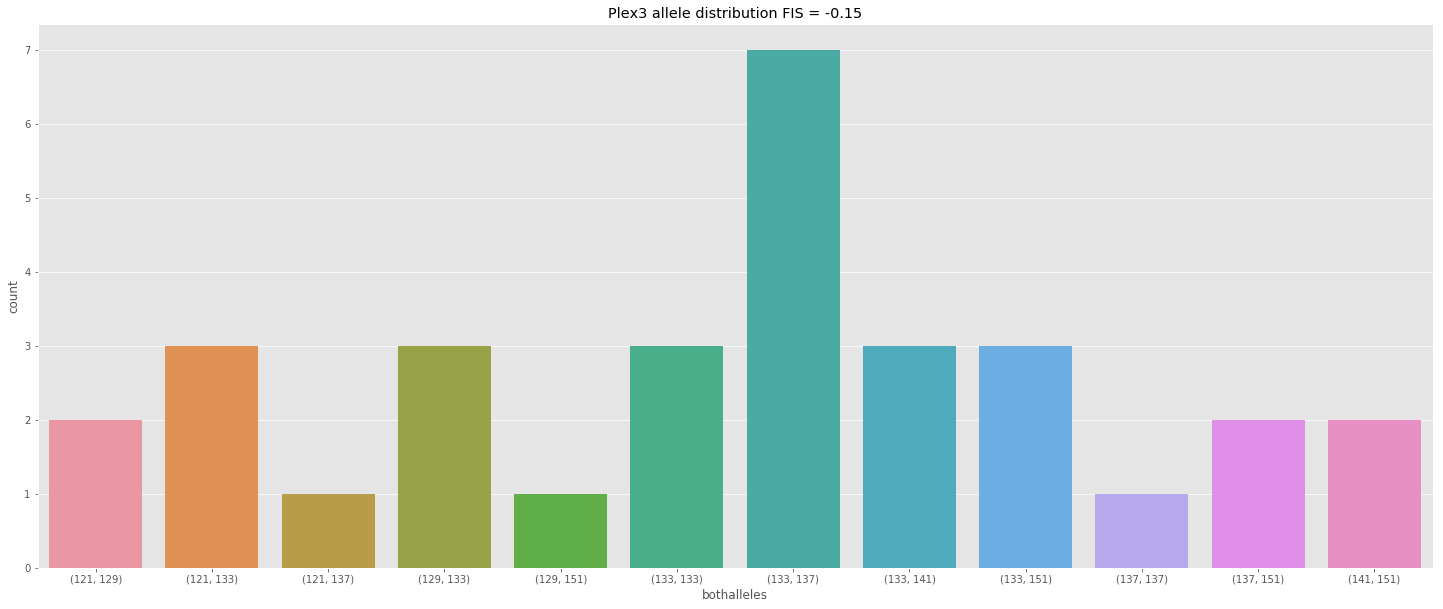

In [10]:
def fuse_equivalents(al1, al2):
    return tuple(np.sort([al1,al2]))

plt.rcParams["figure.figsize"] = (25,10)

plex1df["bothalleles"] = plex1df.apply(lambda x: fuse_equivalents(x['Allele1'], x['Allele2']), axis =1)
examplepl1 = plex1df.copy().sort_values(by='bothalleles')
examplepl1 = examplepl1[examplepl1['bothalleles']!= (0,0)]


plex2df["bothalleles"] = plex2df.apply(lambda x: fuse_equivalents(x['Allele1'], x['Allele2']), axis =1)
examplepl2 = plex2df.copy().sort_values(by='bothalleles')
examplepl2 = examplepl2[examplepl2['bothalleles']!= (0,0)]

plex3df["bothalleles"] = plex3df.apply(lambda x: fuse_equivalents(x['Allele1'], x['Allele2']), axis =1)
examplepl3 = plex3df.copy().sort_values(by='bothalleles')
examplepl3 = examplepl3[examplepl3['bothalleles']!= (0,0)]

Hplex1 = Heterozigosity('bothalleles',examplepl1)
Hexplex1 = Expected_Heterozigosity('bothalleles', examplepl1)
Hplex2 = Heterozigosity('bothalleles',examplepl2)
Hexplex2 = Expected_Heterozigosity('bothalleles', examplepl2)
Hplex3 = Heterozigosity('bothalleles',examplepl3)
Hexplex3 = Expected_Heterozigosity('bothalleles', examplepl3)
print("the observed heterozigosity for plex 1,2,3 are respectively: "+str((Hplex1,Hplex2, Hplex3)))
print("the expected heterozigosity for plex 1,2,3 are respectively: "+str((Hexplex1, Hexplex2, Hplex3)))
FISplex1, FISplex2, FISplex3 = ((Hexplex1 -Hplex1)/Hexplex1,(Hexplex2 -Hplex2)/Hexplex2 ,(Hexplex3 -Hplex3)/Hexplex3)

sns.countplot(x='bothalleles', data= examplepl1)
plt.title("Plex1 allele distribution FIS = " + ('%.2f' % FISplex1))
plt.show()

sns.countplot(x='bothalleles', data= examplepl2)
plt.title("Plex2 allele distribution FIS = "+ ('%.2f' % FISplex2))
plt.show()
sns.countplot(x='bothalleles', data= examplepl3)
plt.title("Plex3 allele distribution FIS = "+ ('%.2f' % FISplex3))
plt.show()

# calculating PCAs for the msats

# join both plexes

In [11]:
plex2df['Sample Name2'] = plex2df['Sample Name'].apply(lambda x: x)
plex2df['Size1plex2'] = plex2df['Size1'].apply(lambda x: x)
plex2df['Size2plex2'] = plex2df['Size2'].apply(lambda x: x)
plex3df['Sample Name3'] = plex3df['Sample Name'].apply(lambda x: x)
plex3df['Size1plex3'] = plex3df['Size1'].apply(lambda x: x)
plex3df['Size2plex3'] = plex3df['Size2'].apply(lambda x: x)

In [12]:
newDF = pd.concat([plex1df[['Sample Name', 'Size1', 'Size2']] ,plex2df[['Size1plex2', 'Size2plex2']],
                   plex3df[['Size1plex3', 'Size2plex3', 'Sample Name3']], plex2df['Sample Name2']], axis =1)
newDF.head()

,Sample Name,Size1,Size2,Size1plex2,Size2plex2,Size1plex3,Size2plex3,Sample Name3,Sample Name2
0,MP1-AL-025,287.62,295.83,152.19,160.67,131.40,137.01,MP3-AL-025,MP2-AL-025
1,MP1-AL-026,287.60,299.69,160.67,160.67,128.53,132.82,MP3-AL-026,MP2-AL-026
2,MP1-AL-027,287.60,308.04,152.28,164.61,128.67,132.81,MP3-AL-027,MP2-AL-027
3,MP1-AL-028,287.72,291.81,152.12,152.12,137.14,150.85,MP3-AL-028,MP2-AL-028
4,MP1-AL-029,283.72,291.79,168.88,185.07,132.97,141.73,MP3-AL-029,MP2-AL-029


In [13]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)

plex1df_wo_blank =  plex1df[plex1df['Allele1']!=0].copy()
plex2df_wo_blank =  plex1df[plex2df['Allele1']!=0].copy()
bothplexdf = newDF[newDF['Size1']!= 0].copy()


Xplex1 = plex1df_wo_blank.iloc[:,8:10].values
Xplex2 = plex2df_wo_blank.iloc[:,8:10].values
Xboth = bothplexdf.iloc[:,1:7].values

PCvalues = sklearn_pca.fit_transform(Xplex1)
PCvalues2 = sklearn_pca.fit_transform(Xplex2)
PCvaluesboth = sklearn_pca.fit_transform(Xboth)

plex1df_wo_blank["PC1"] = pd.Series(PCvalues[:,0], index = plex1df_wo_blank.index)
plex1df_wo_blank["PC2"] = pd.Series(PCvalues[:,1], index = plex1df_wo_blank.index)

plex2df_wo_blank["PC1"] = pd.Series(PCvalues2[:,0], index = plex2df_wo_blank.index)
plex2df_wo_blank["PC2"] = pd.Series(PCvalues2[:,1], index = plex2df_wo_blank.index)

bothplexdf["PC1"] = pd.Series(PCvaluesboth[:,0], index = bothplexdf.index)
bothplexdf["PC2"] = pd.Series(PCvaluesboth[:,1], index = bothplexdf.index)

Text(0.5,1,'Plex1/2/3 PCA')

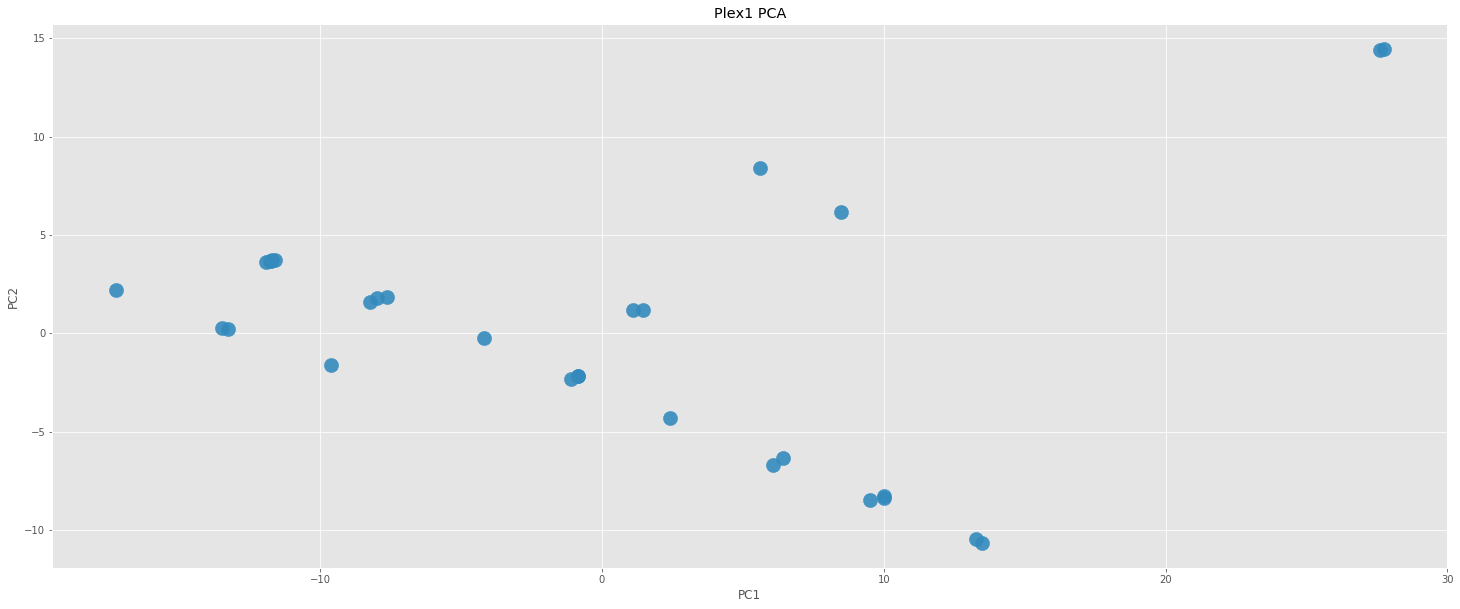

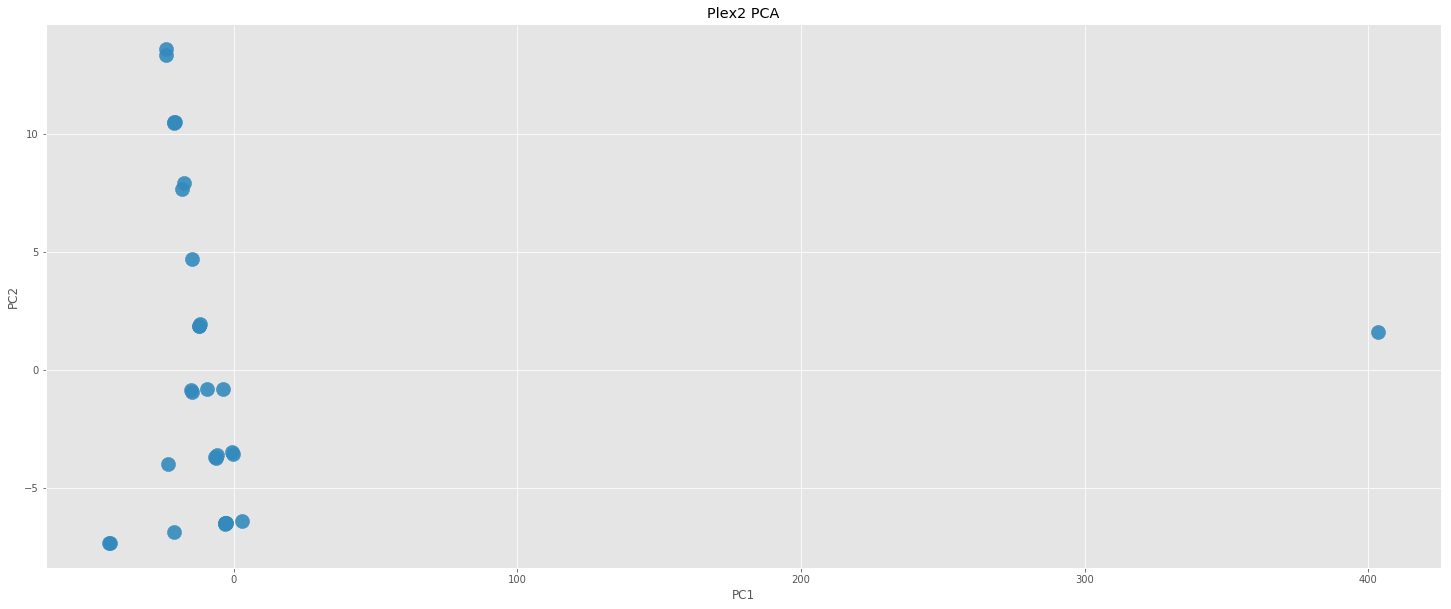

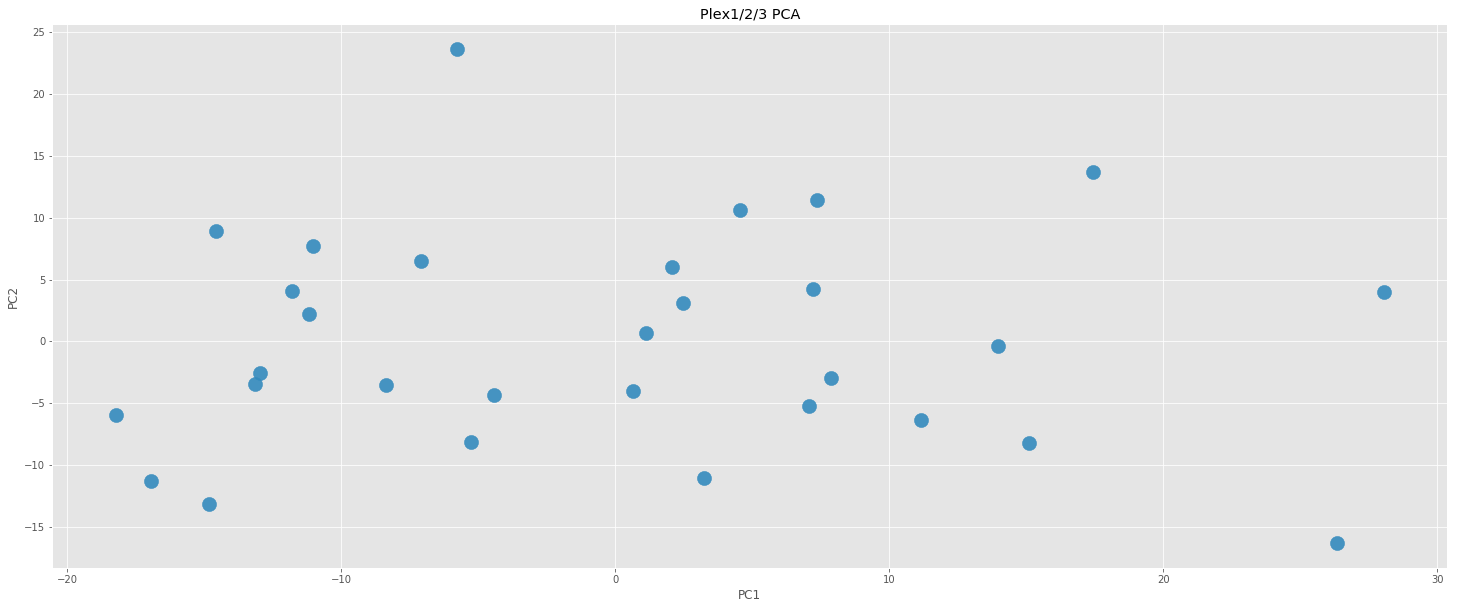

In [14]:
plex1df_wo_blank.plot.scatter('PC1', 'PC2', s = 200, alpha = .9)
plt.title('Plex1 PCA')
plex2df_wo_blank.plot.scatter('PC1', 'PC2', s = 200, alpha = .9)
plt.title('Plex2 PCA')
bothplexdf.plot.scatter('PC1', 'PC2', s = 200, alpha = .9)
plt.title('Plex1/2/3 PCA')

In [15]:
from sklearn.manifold import TSNE
TSNEvalues1 = TSNE(n_components=2,  perplexity=8.0).fit_transform(Xplex1)
TSNEvalues2 = TSNE(n_components=2,  perplexity=8.0).fit_transform(Xplex2)
TSNEvaluesboth = TSNE(n_components=2,  perplexity=8.0).fit_transform(Xboth)


plex1df_wo_blank["tSNE1"] = pd.Series(TSNEvalues1[:,0], index = plex1df_wo_blank.index)
plex1df_wo_blank["tSNE2"] = pd.Series(TSNEvalues1[:,1], index = plex1df_wo_blank.index)

plex2df_wo_blank["tSNE1"] = pd.Series(TSNEvalues2[:,0], index = plex2df_wo_blank.index)
plex2df_wo_blank["tSNE2"] = pd.Series(TSNEvalues2[:,1], index = plex2df_wo_blank.index)

bothplexdf["tSNE1"] = pd.Series(TSNEvaluesboth[:,0], index = bothplexdf.index)
bothplexdf["tSNE2"] = pd.Series(TSNEvaluesboth[:,1], index = bothplexdf.index)

Text(0.5,1,'Plex1/2/3 tSNE')

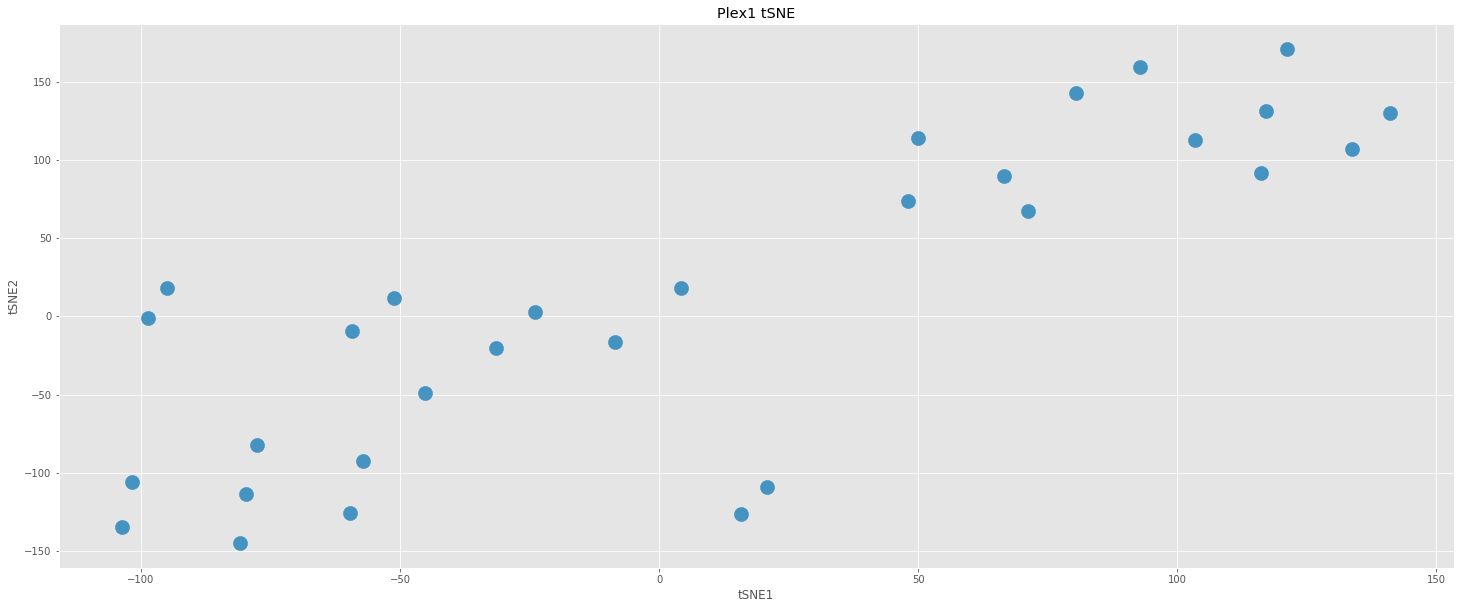

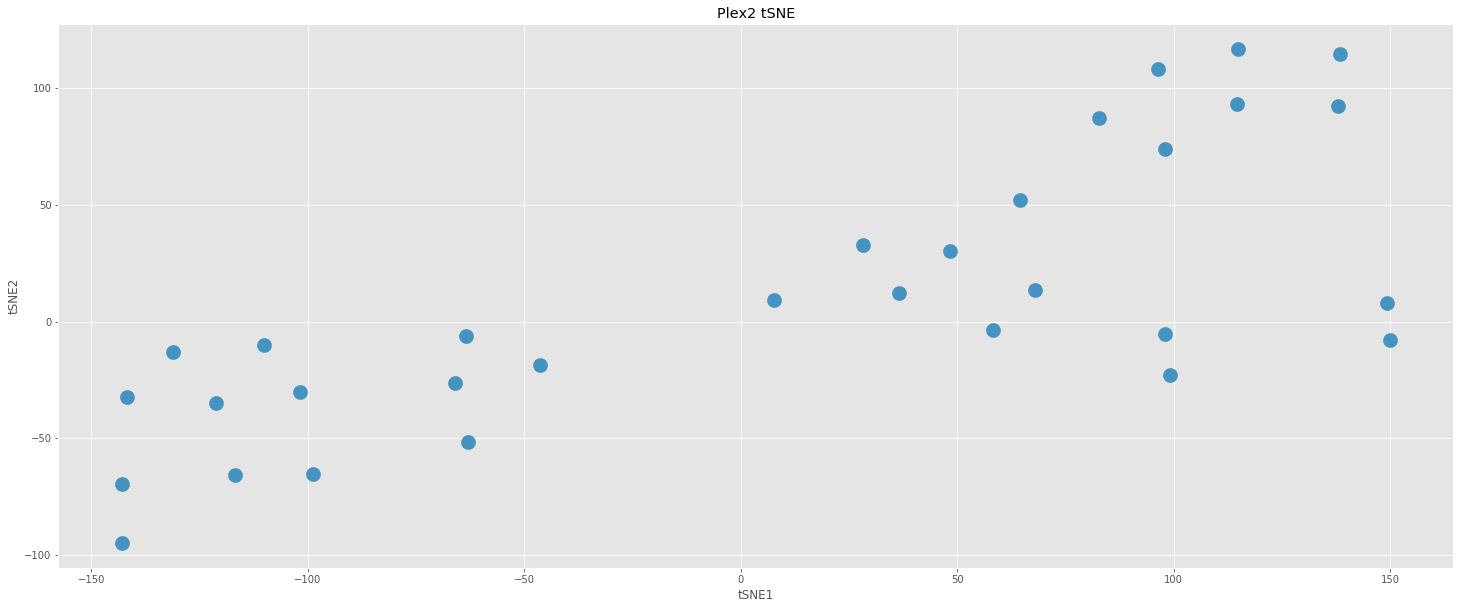

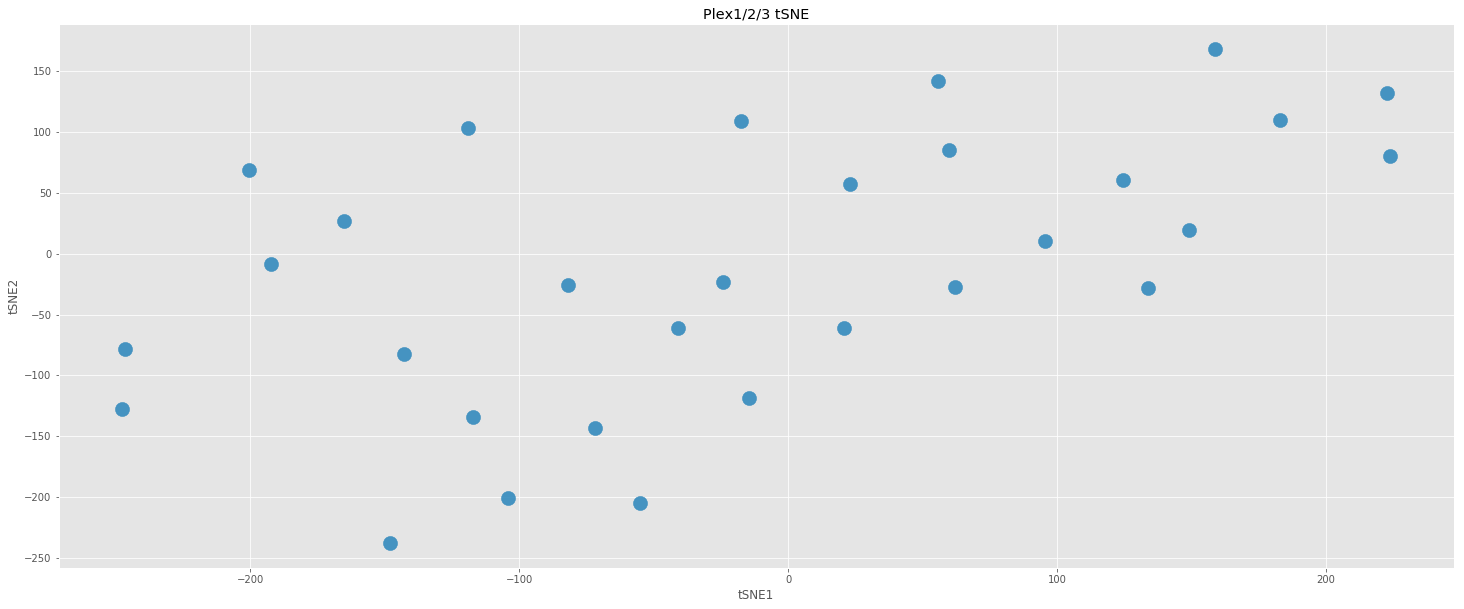

In [16]:
plex1df_wo_blank.plot.scatter('tSNE1', 'tSNE2', s = 200, alpha = .9)
plt.title('Plex1 tSNE')
plex2df_wo_blank.plot.scatter('tSNE1', 'tSNE2', s = 200, alpha = .9)
plt.title('Plex2 tSNE')
bothplexdf.plot.scatter('tSNE1', 'tSNE2', s = 200, alpha = .9)
plt.title('Plex1/2/3 tSNE')